In [ ]:
!nvidia-smi

Sat Nov 15 14:04:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   41C    P8             12W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ROBOFLOW_API_KEY")
project = rf.workspace("capstone4").project("calory-wh1mj")
version = project.version(3)
dataset = version.download("yolov12")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [ ]:
!cat {dataset.location}/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 12
names: ['Ayam Goreng -260 kal per 100 gr-', 'Capcay -67 kal per 100gr-', 'Nasi -129 kal per 100gr-', 'Sayur bayam -36 kal per 100gr-', 'Sayur kangkung -98 kal per 100gr-', 'Sayur sop -22 kal per 100gr-', 'Tahu -80 kal per 100 gr-', 'Telur Dadar -93 kal per 100gr-', 'Telur Mata Sapi -110kal1butir-', 'Telur Rebus -78kal 1butir-', 'Tempe -225 kal per 100 gr-', 'Tumis buncis -65 kal per 100gr-']

roboflow:
  workspace: capstone4
test: ../test/images
train: ../train/images
val: ../valid/images


In [ ]:
#download pretrained model of YOLOv12
!wget https://github.com/sunsmarterjie/yolov12/releases/download/v1.0/yolov12l.pt

--2025-11-15 14:13:48--  https://github.com/sunsmarterjie/yolov12/releases/download/v1.0/yolov12l.pt
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/928546208/2952e503-5afb-44ca-b674-a435e8bf7847?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-11-15T15%3A09%3A35Z&rscd=attachment%3B+filename%3Dyolov12l.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-11-15T14%3A08%3A46Z&ske=2025-11-15T15%3A09%3A35Z&sks=b&skv=2018-11-09&sig=b6oog5qz7AYdbB6%2FcUT3tZmoWgpiSOIkNgkrnjemqD4%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2MzIxNzgyOCwibmJmIjoxNzYzMjE2MDI4LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5ibG9iLmNv

In [ ]:
#define pretrained model YOLOv12 Large model
from ultralytics import YOLO

# Load YOLOv12-large
model = YOLO("yolov12l.pt")

In [ ]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(256, eps=0.001, momentum=0.03, affine=True, track_

In [ ]:
dataset.location

'/content/Calory-3'

In [ ]:
results = model.train(
    data='/content/Calory-3/data.yaml',
    epochs=150,
    batch=16,
    imgsz=640,

    # OPTIMIZATION
    optimizer='AdamW',
    lr0=0.002,
    lrf=0.01,
    weight_decay=0.0005,
    patience=30,

    # NON-GEOMETRIC AUGS
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,

    # GEOMETRIC AUGS
    # fliplr=0.5,
    # flipud=0.1,
    # scale=0.3,

    # DISABLE HEAVY AUGS
    mosaic=0.0,
    mixup=0.0,
    shear=0.0,
    perspective=0.0,

    val=True,
    verbose=True,
)



Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Calory-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.002, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov12l.pt, momentum=0.937, mosaic=0.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=30, perspective=0.0, plots=True, po

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls /content/runs/detect/train3

args.yaml			 labels.jpg		val_batch0_pred.jpg
BoxF1_curve.png			 results.csv		val_batch1_labels.jpg
BoxP_curve.png			 results.png		val_batch1_pred.jpg
BoxPR_curve.png			 train_batch0.jpg	val_batch2_labels.jpg
BoxR_curve.png			 train_batch1.jpg	val_batch2_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg	weights
confusion_matrix.png		 val_batch0_labels.jpg


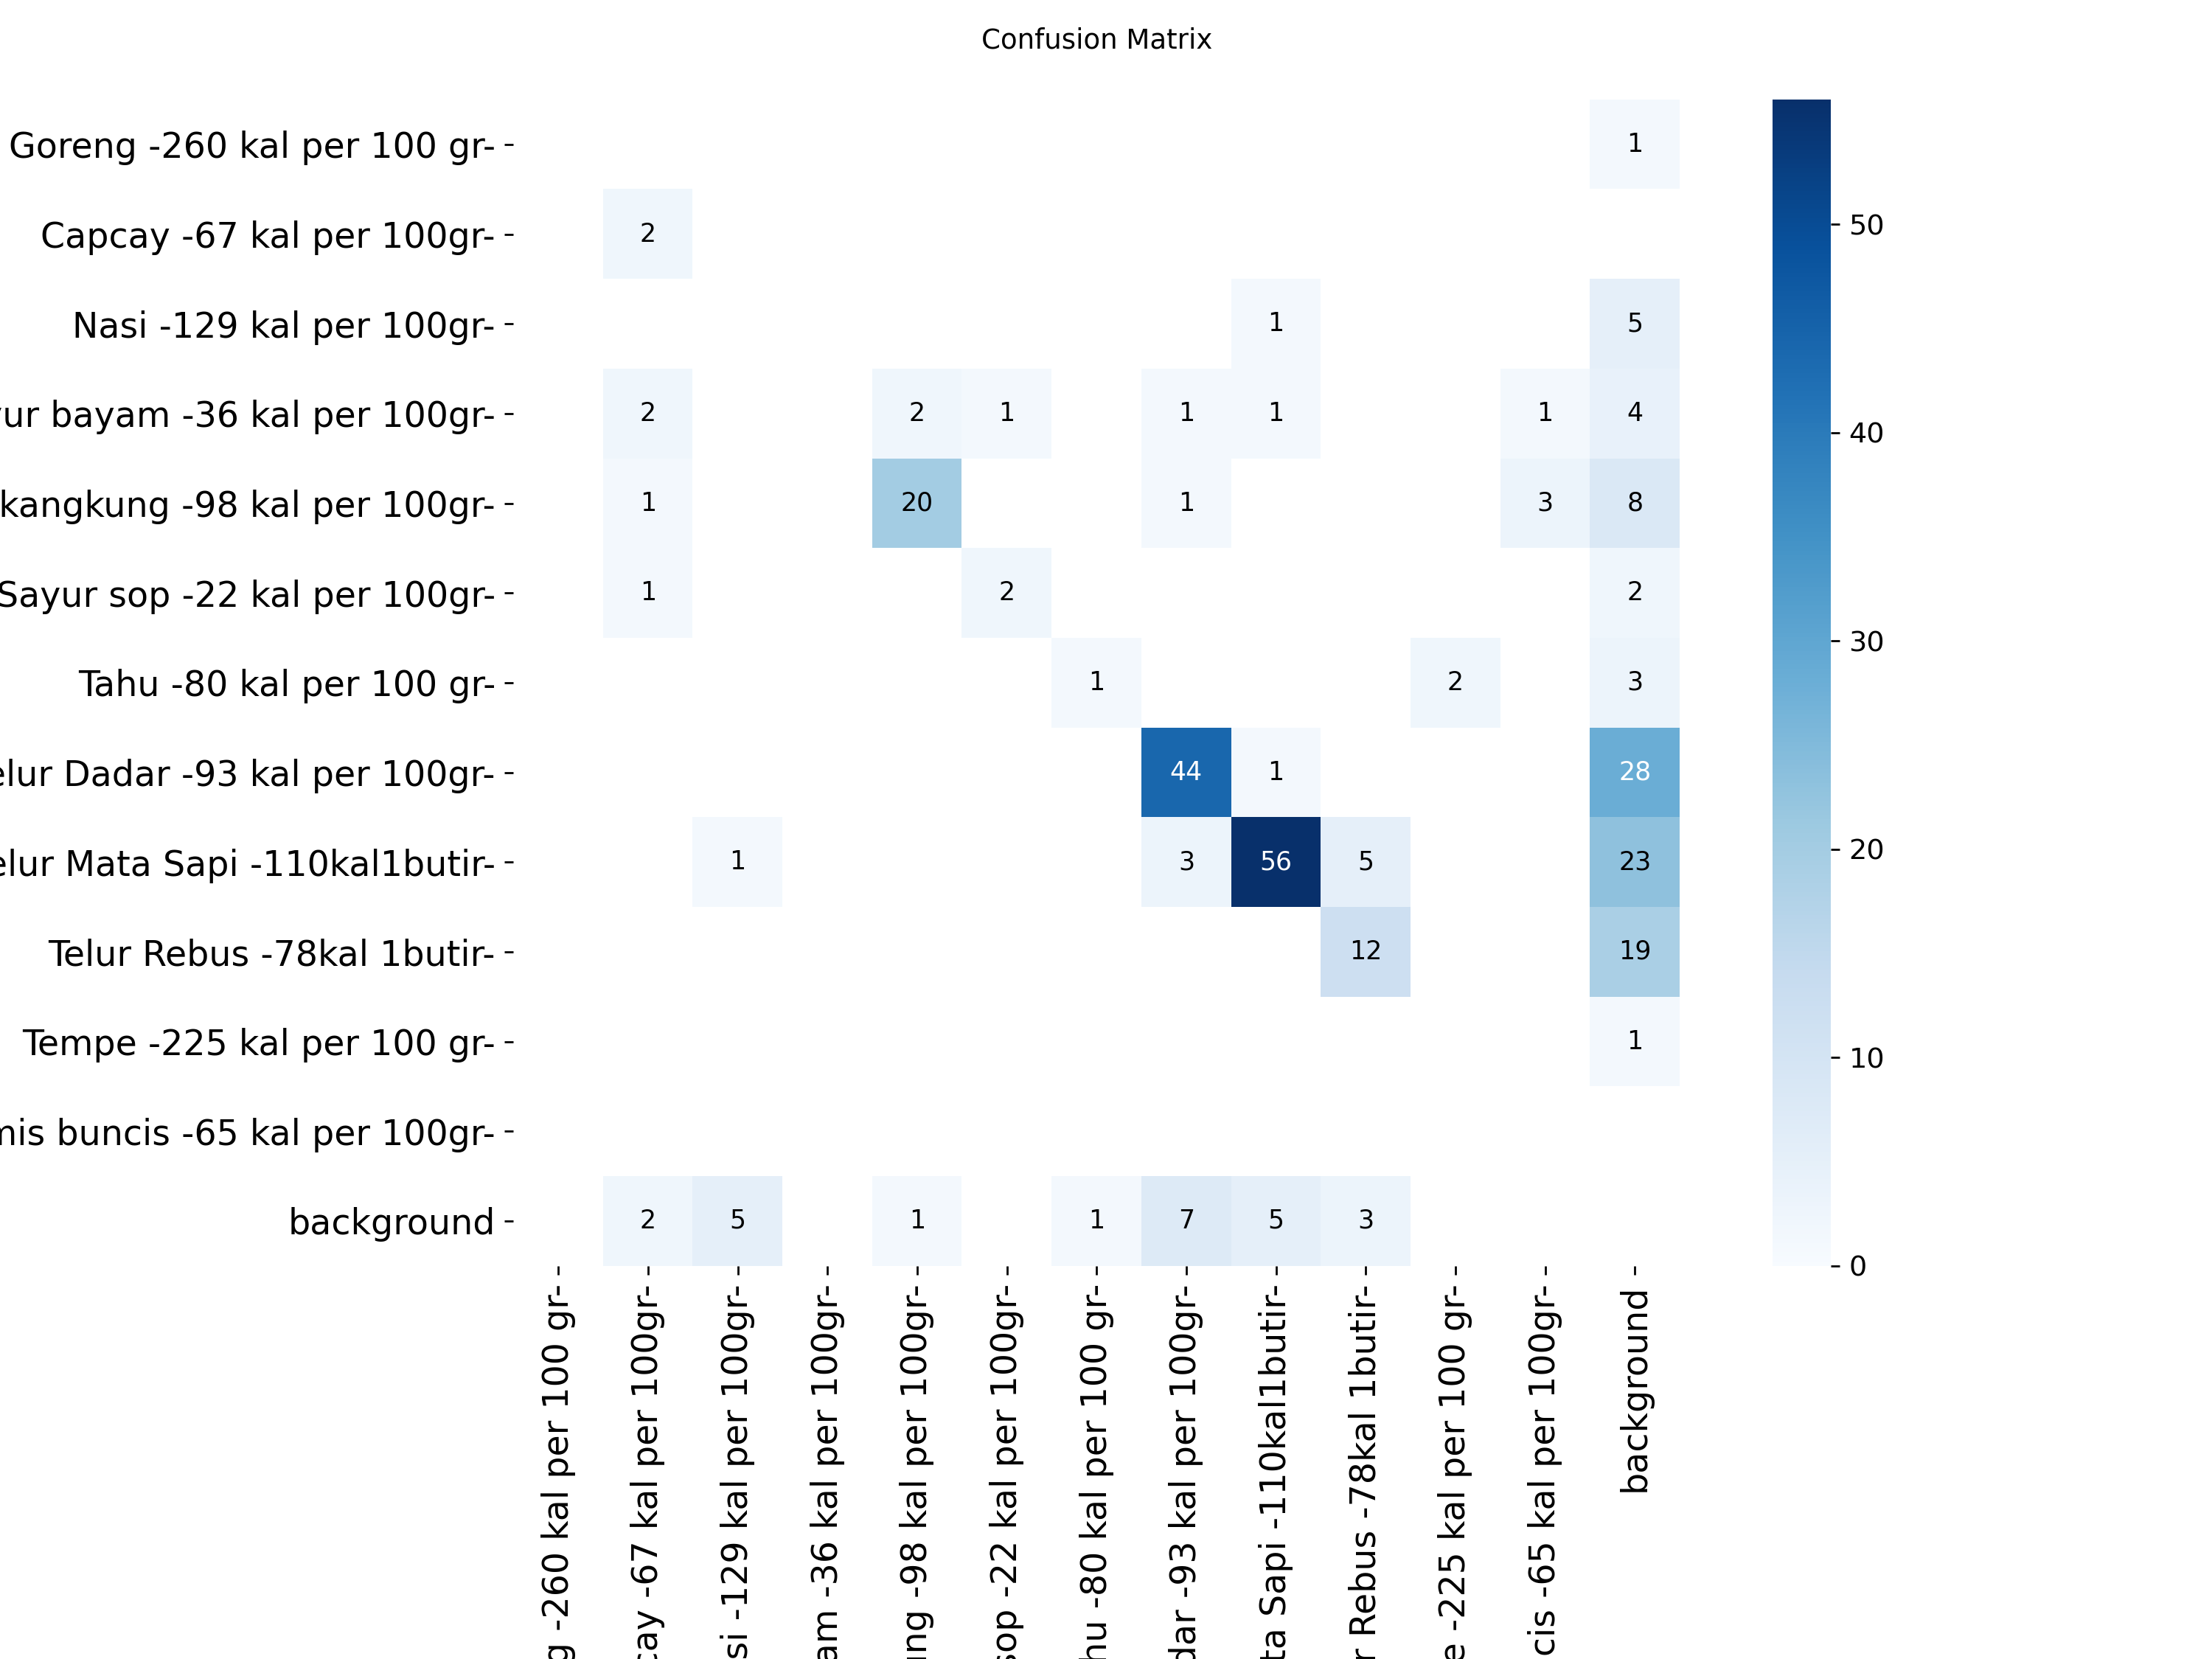

In [ ]:
from IPython.display import Image

Image(filename='/content/runs/detect/train3/confusion_matrix.png', width=1000)


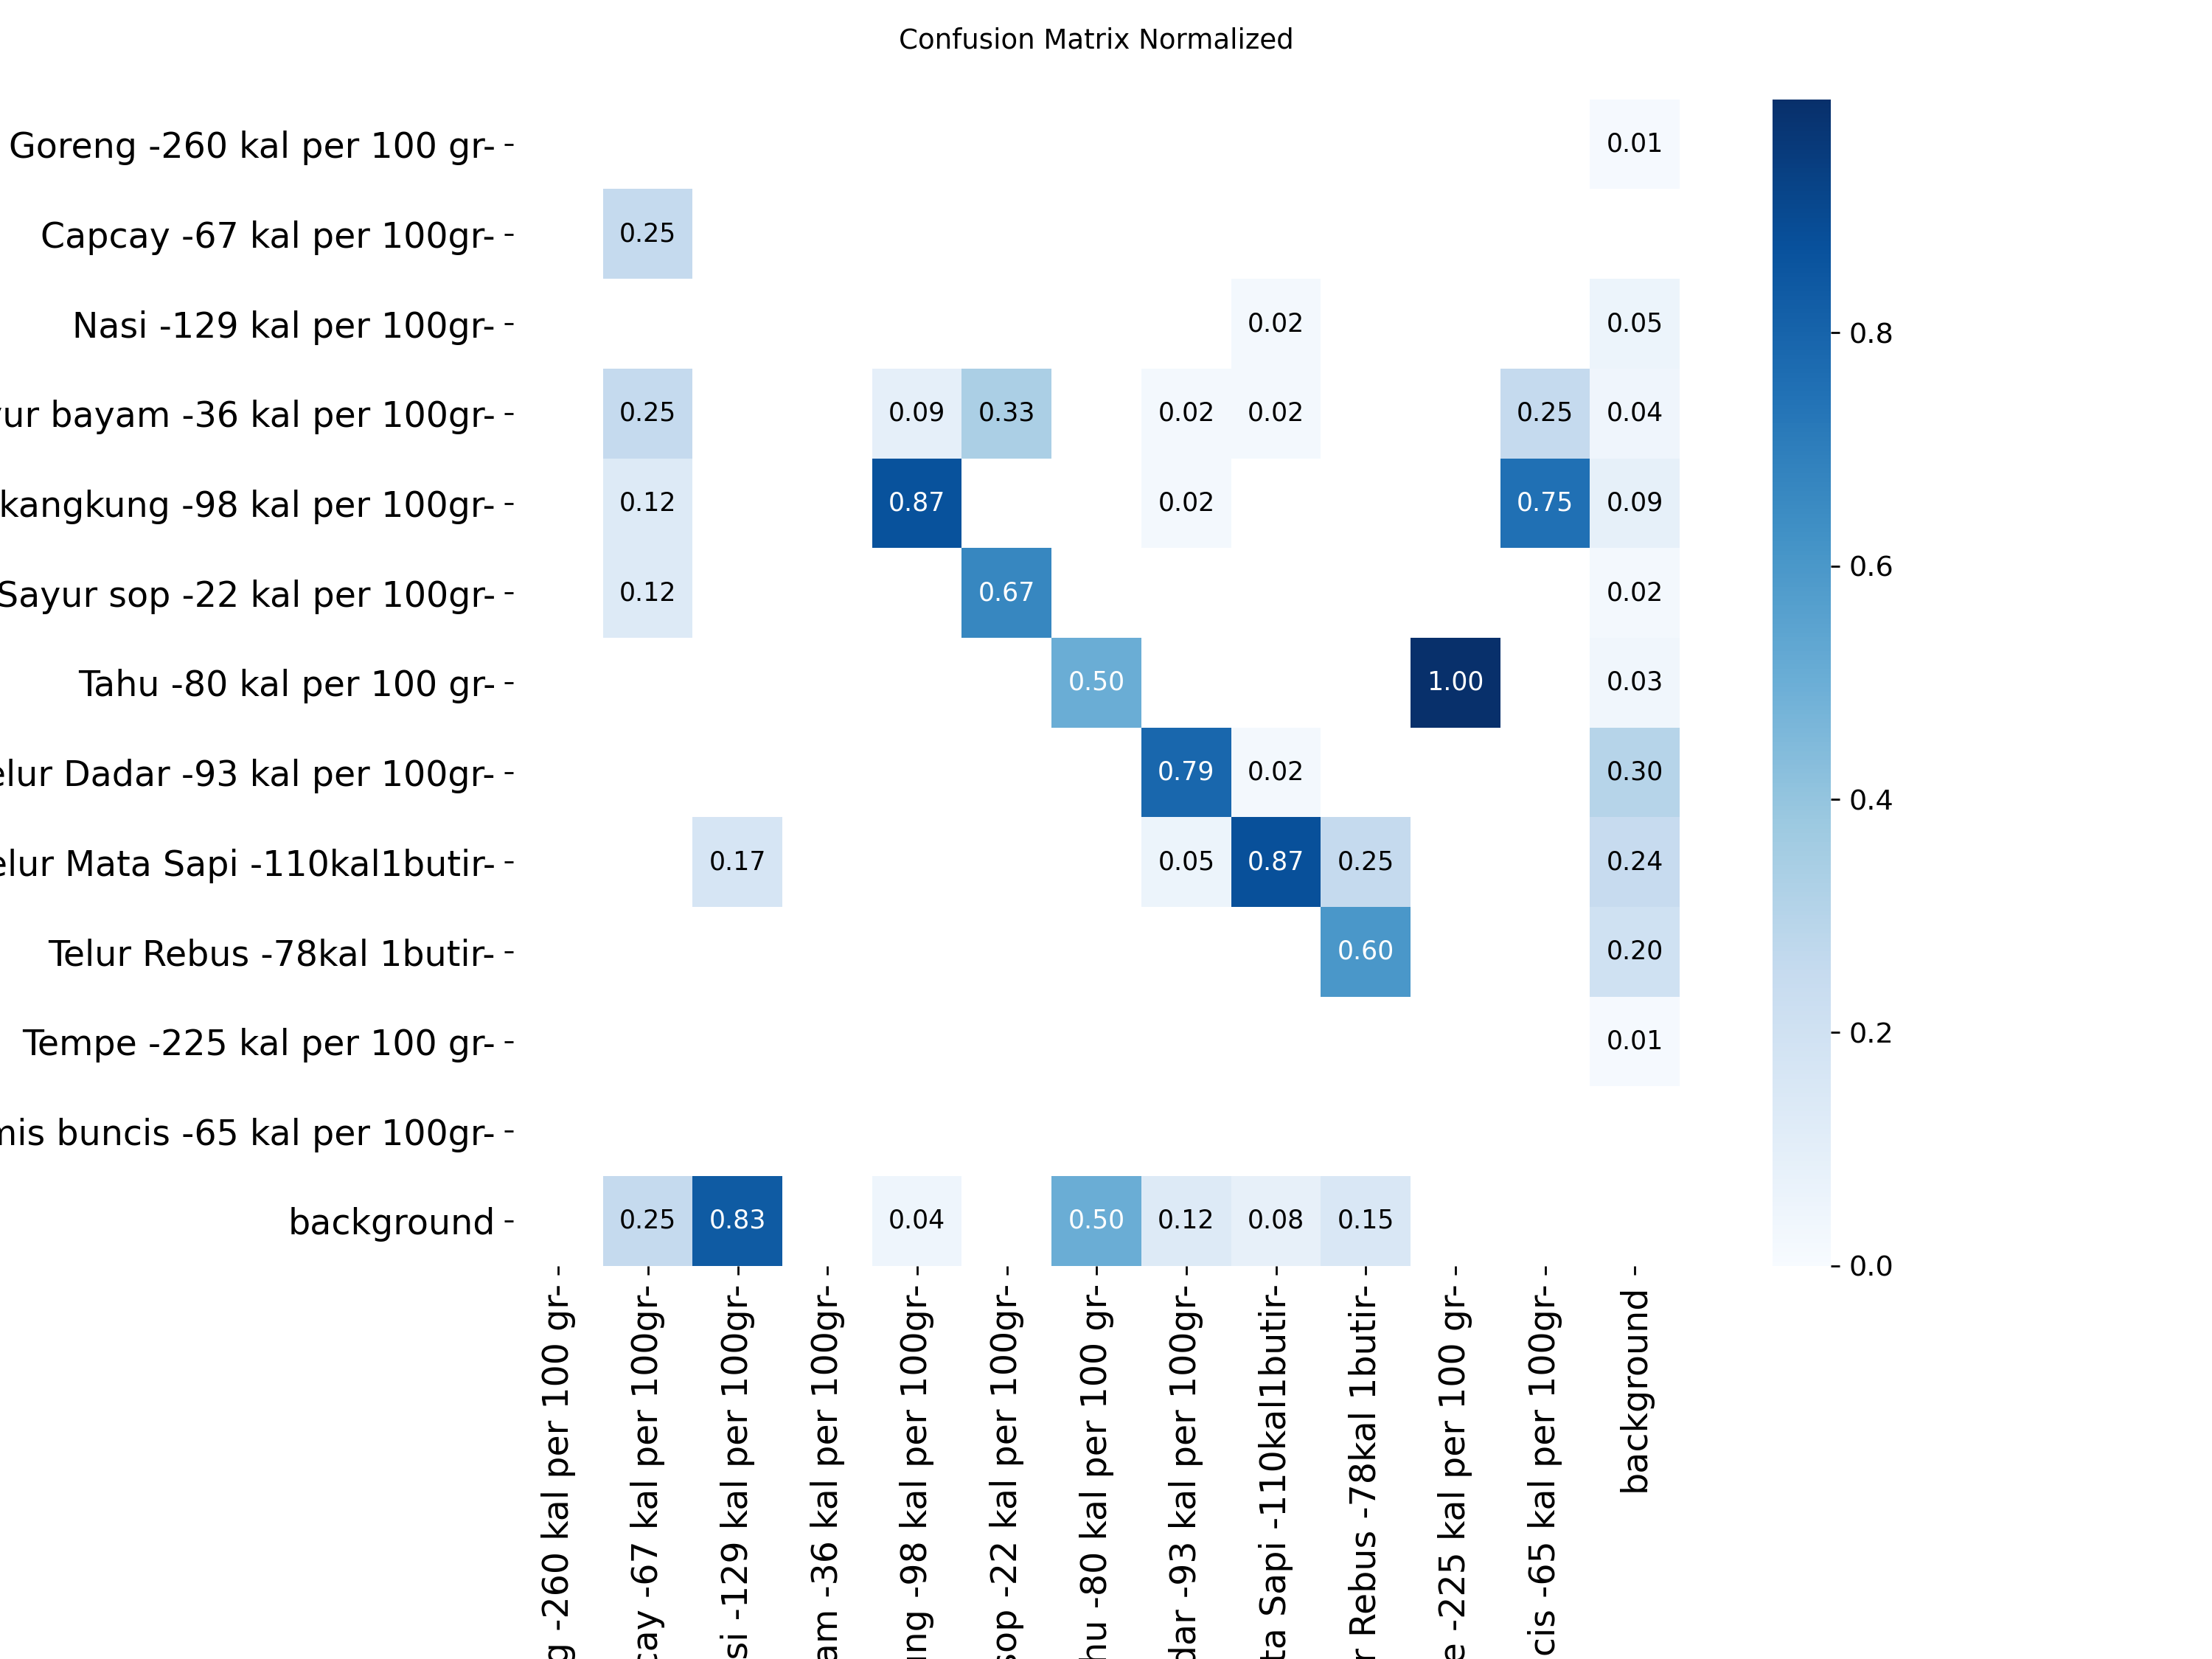

In [ ]:
#SHOWING CONFUSION MATRIX

Image(filename=f'/content/runs/detect/train3/confusion_matrix_normalized.png', width=1000)

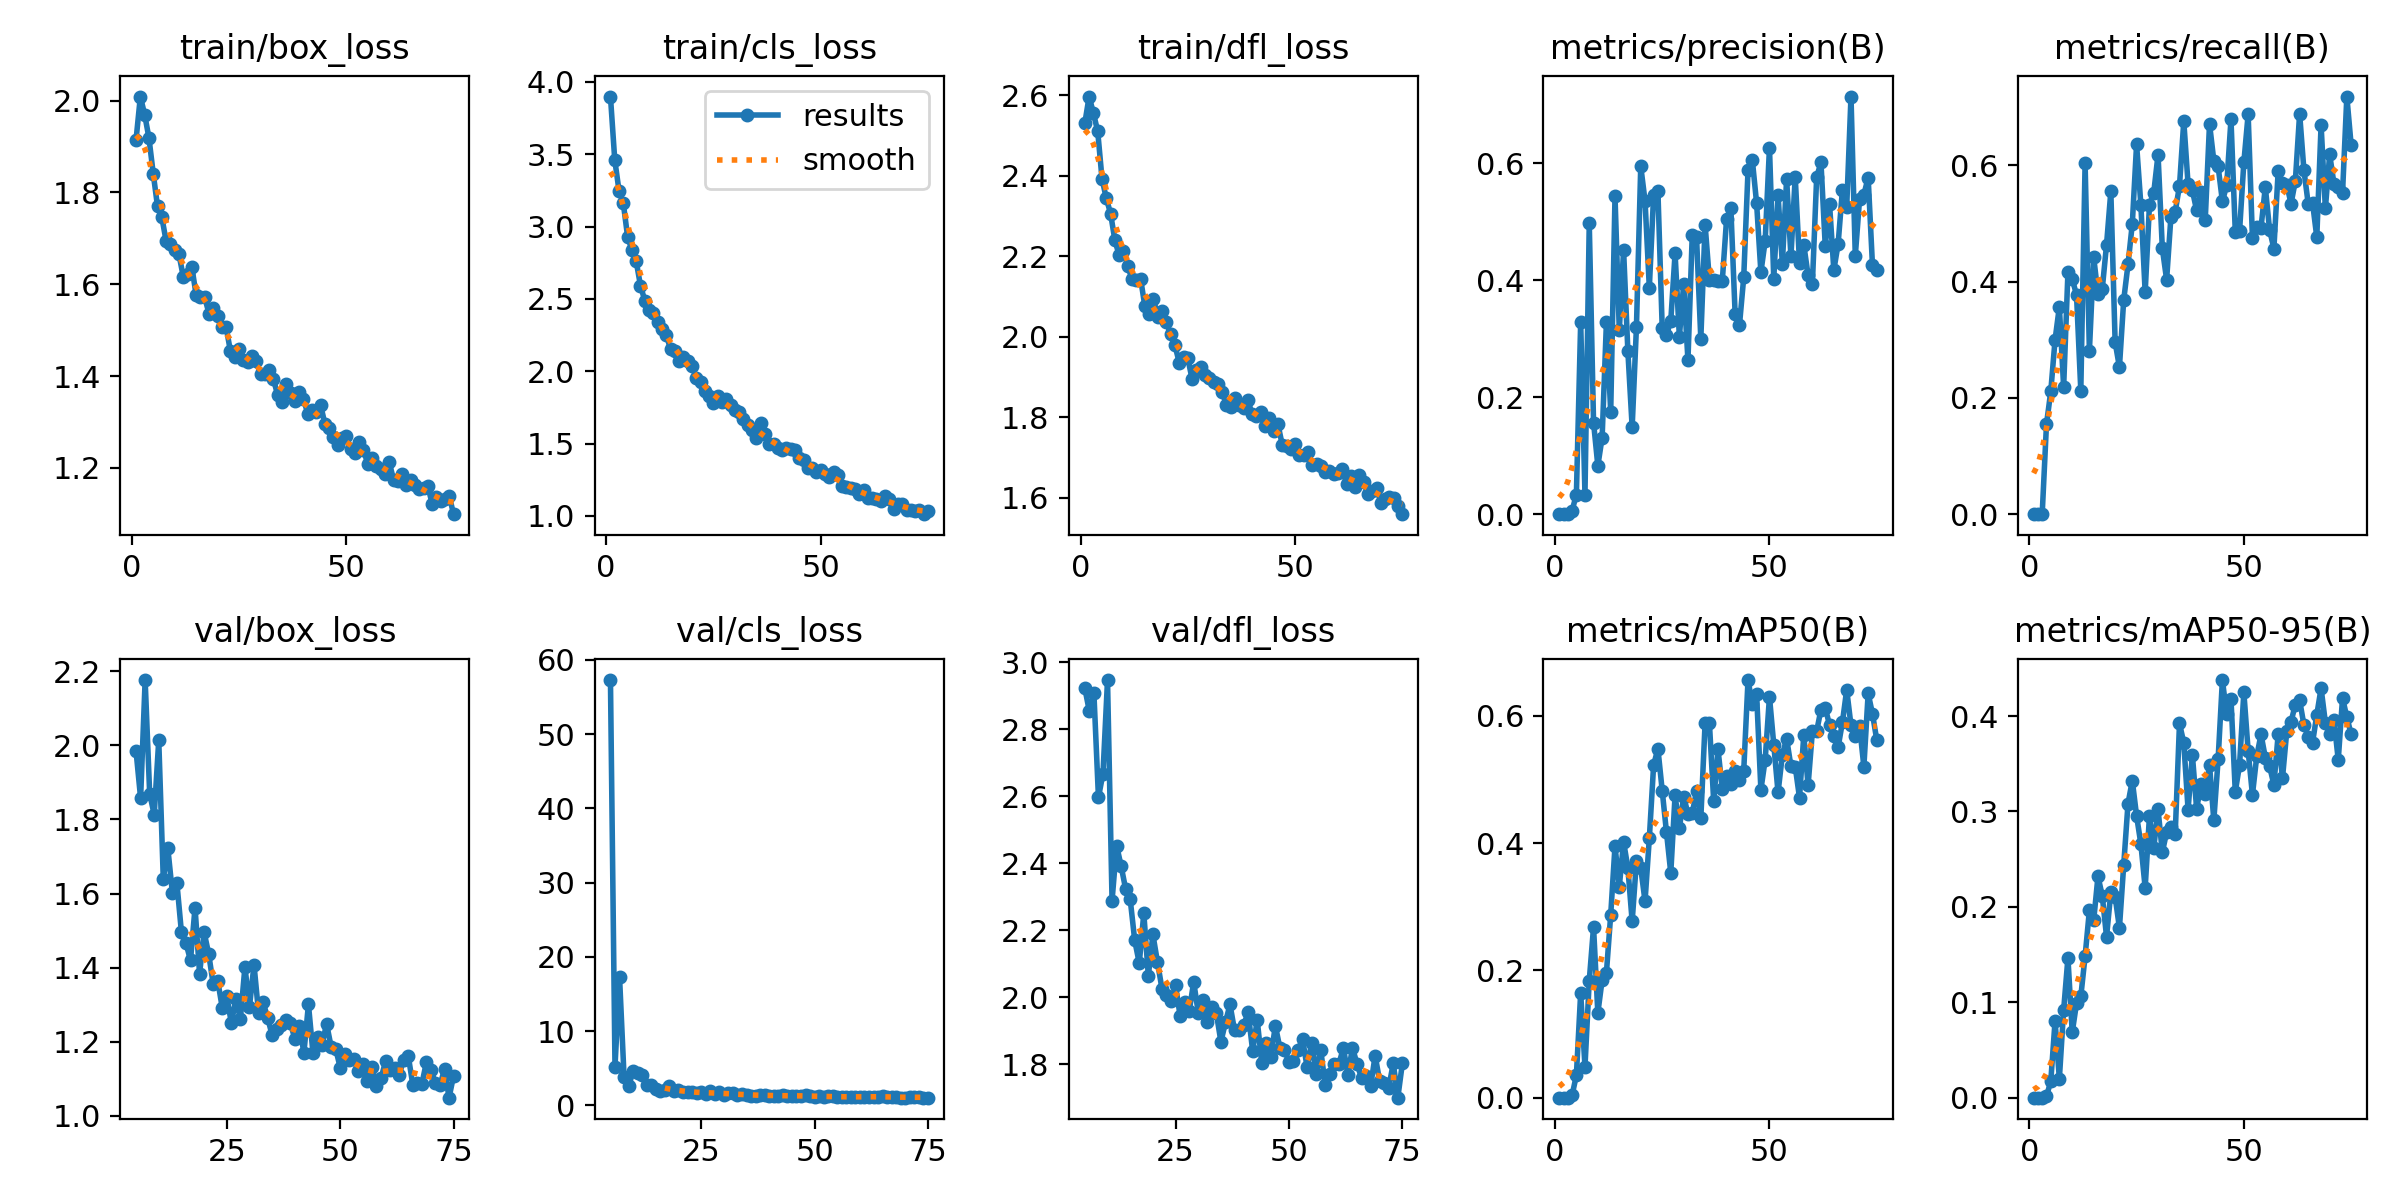

In [ ]:
#SHOW GRAPH : LOSS_METRICS, RECALL, PRECISION
Image(filename='/content/runs/detect/train3/results.png', width=1000)

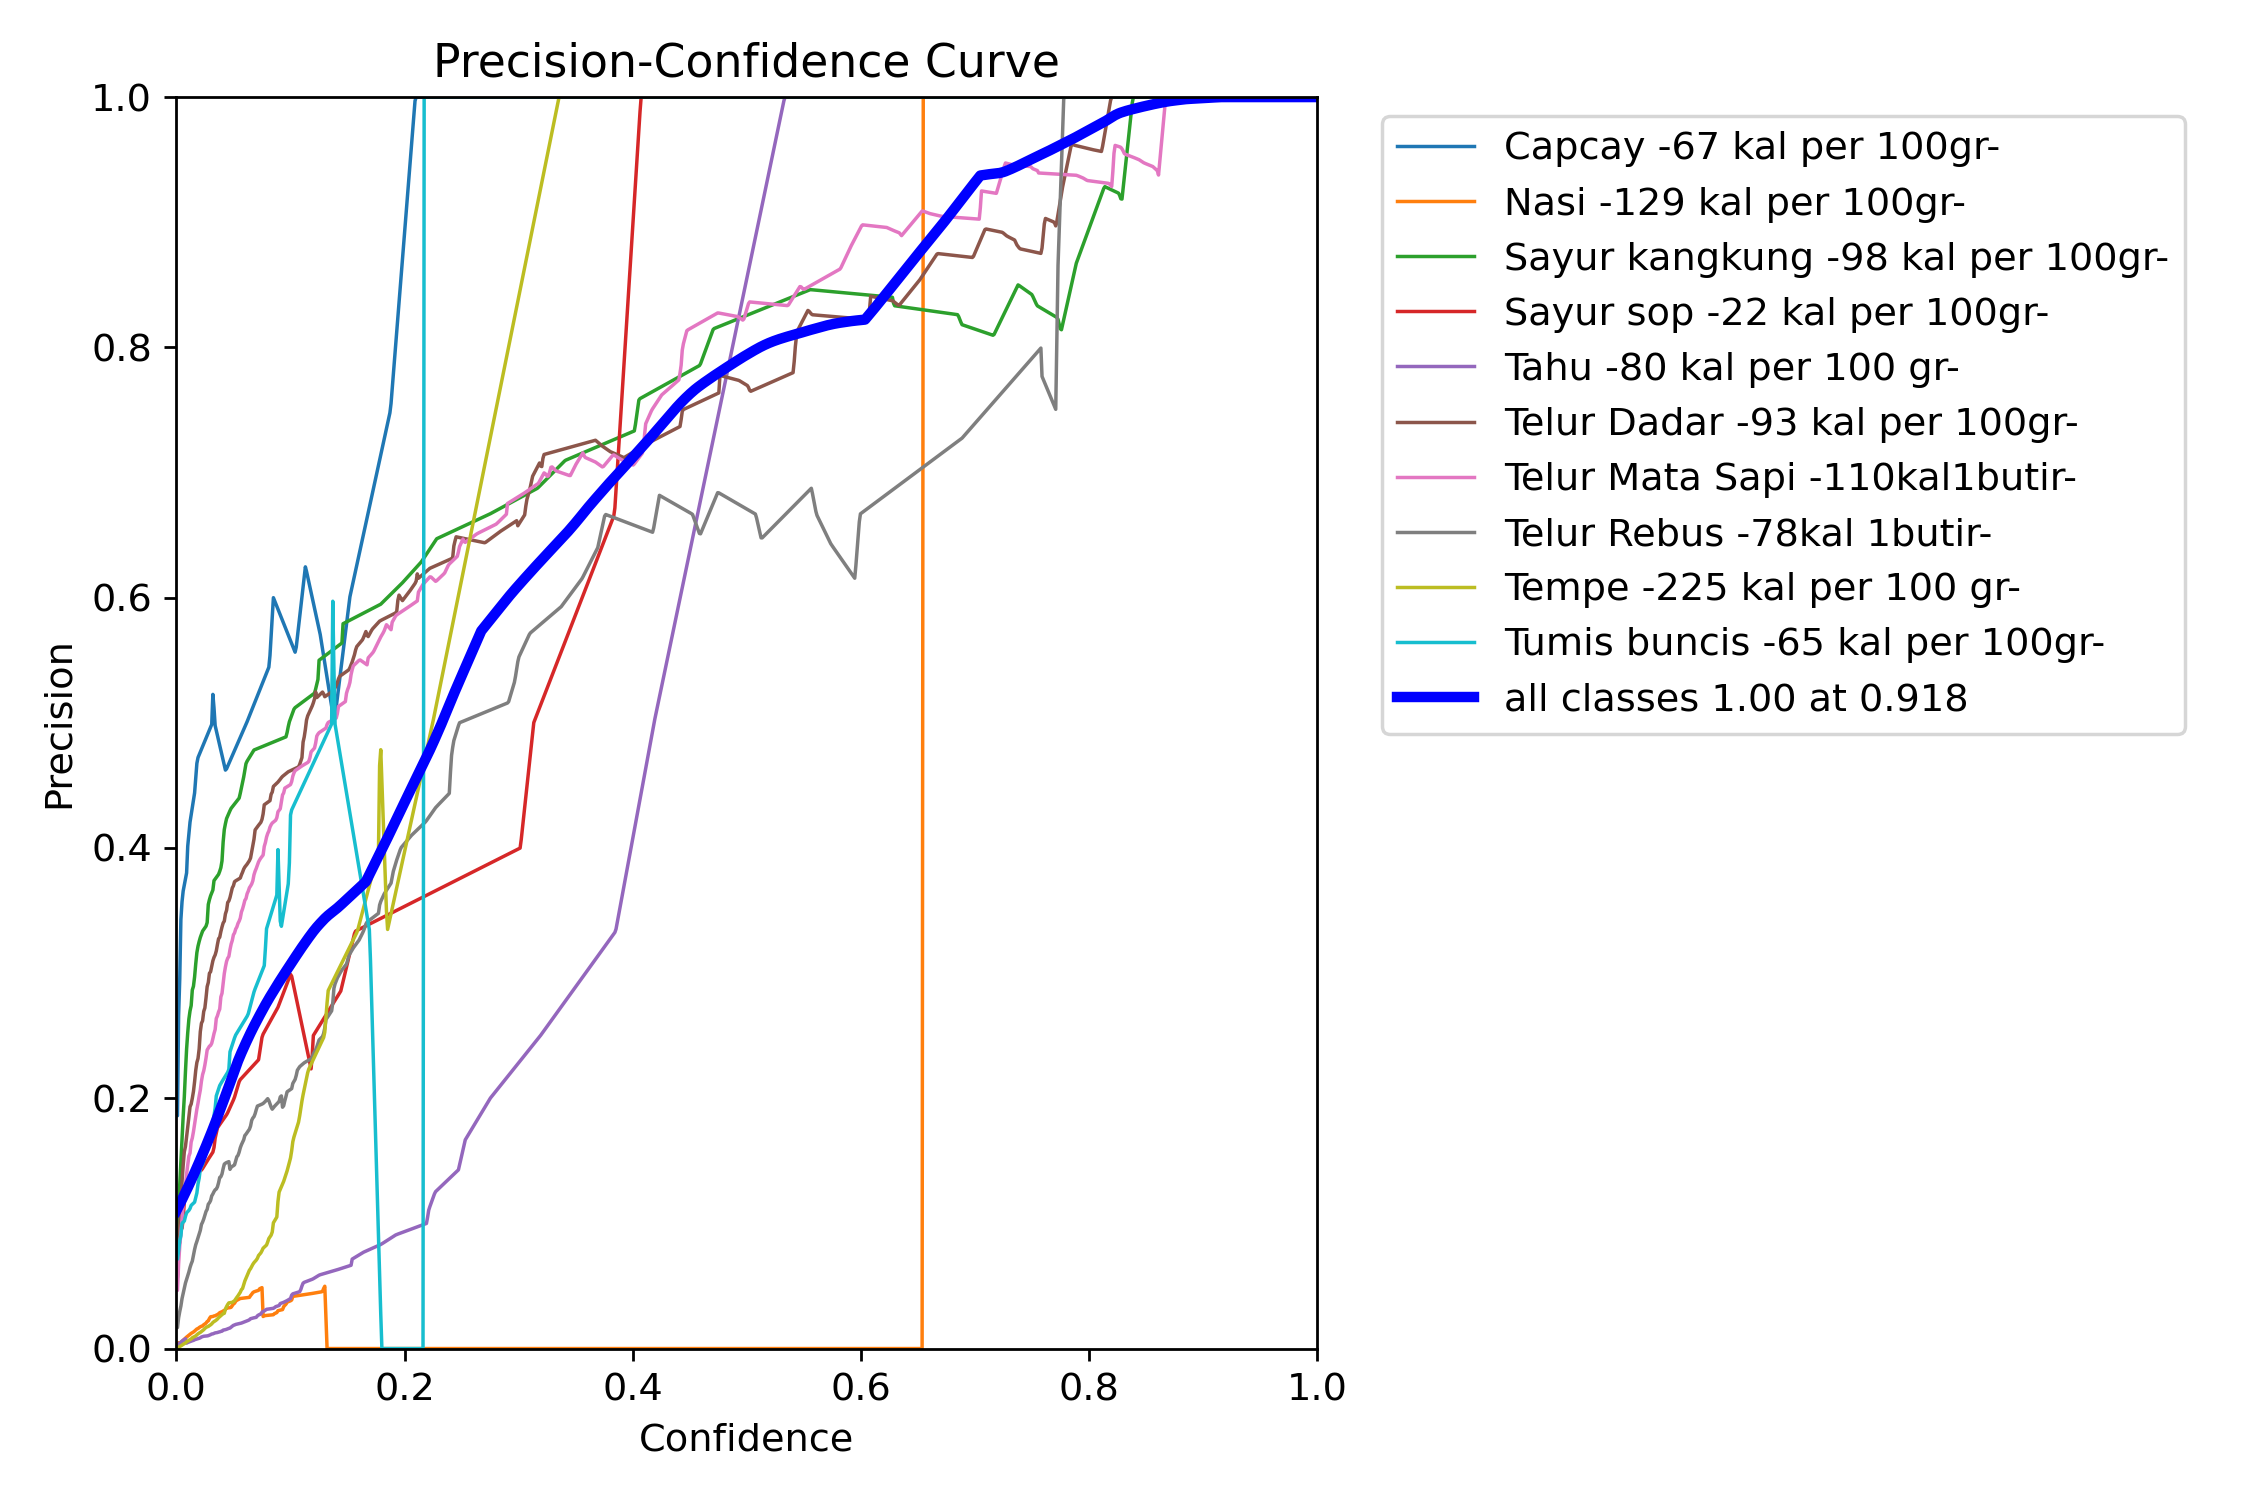

In [ ]:
#PRECISION CONFIDENCE CURVE
Image(filename='/content/runs/detect/train3/BoxP_curve.png', width=1000)

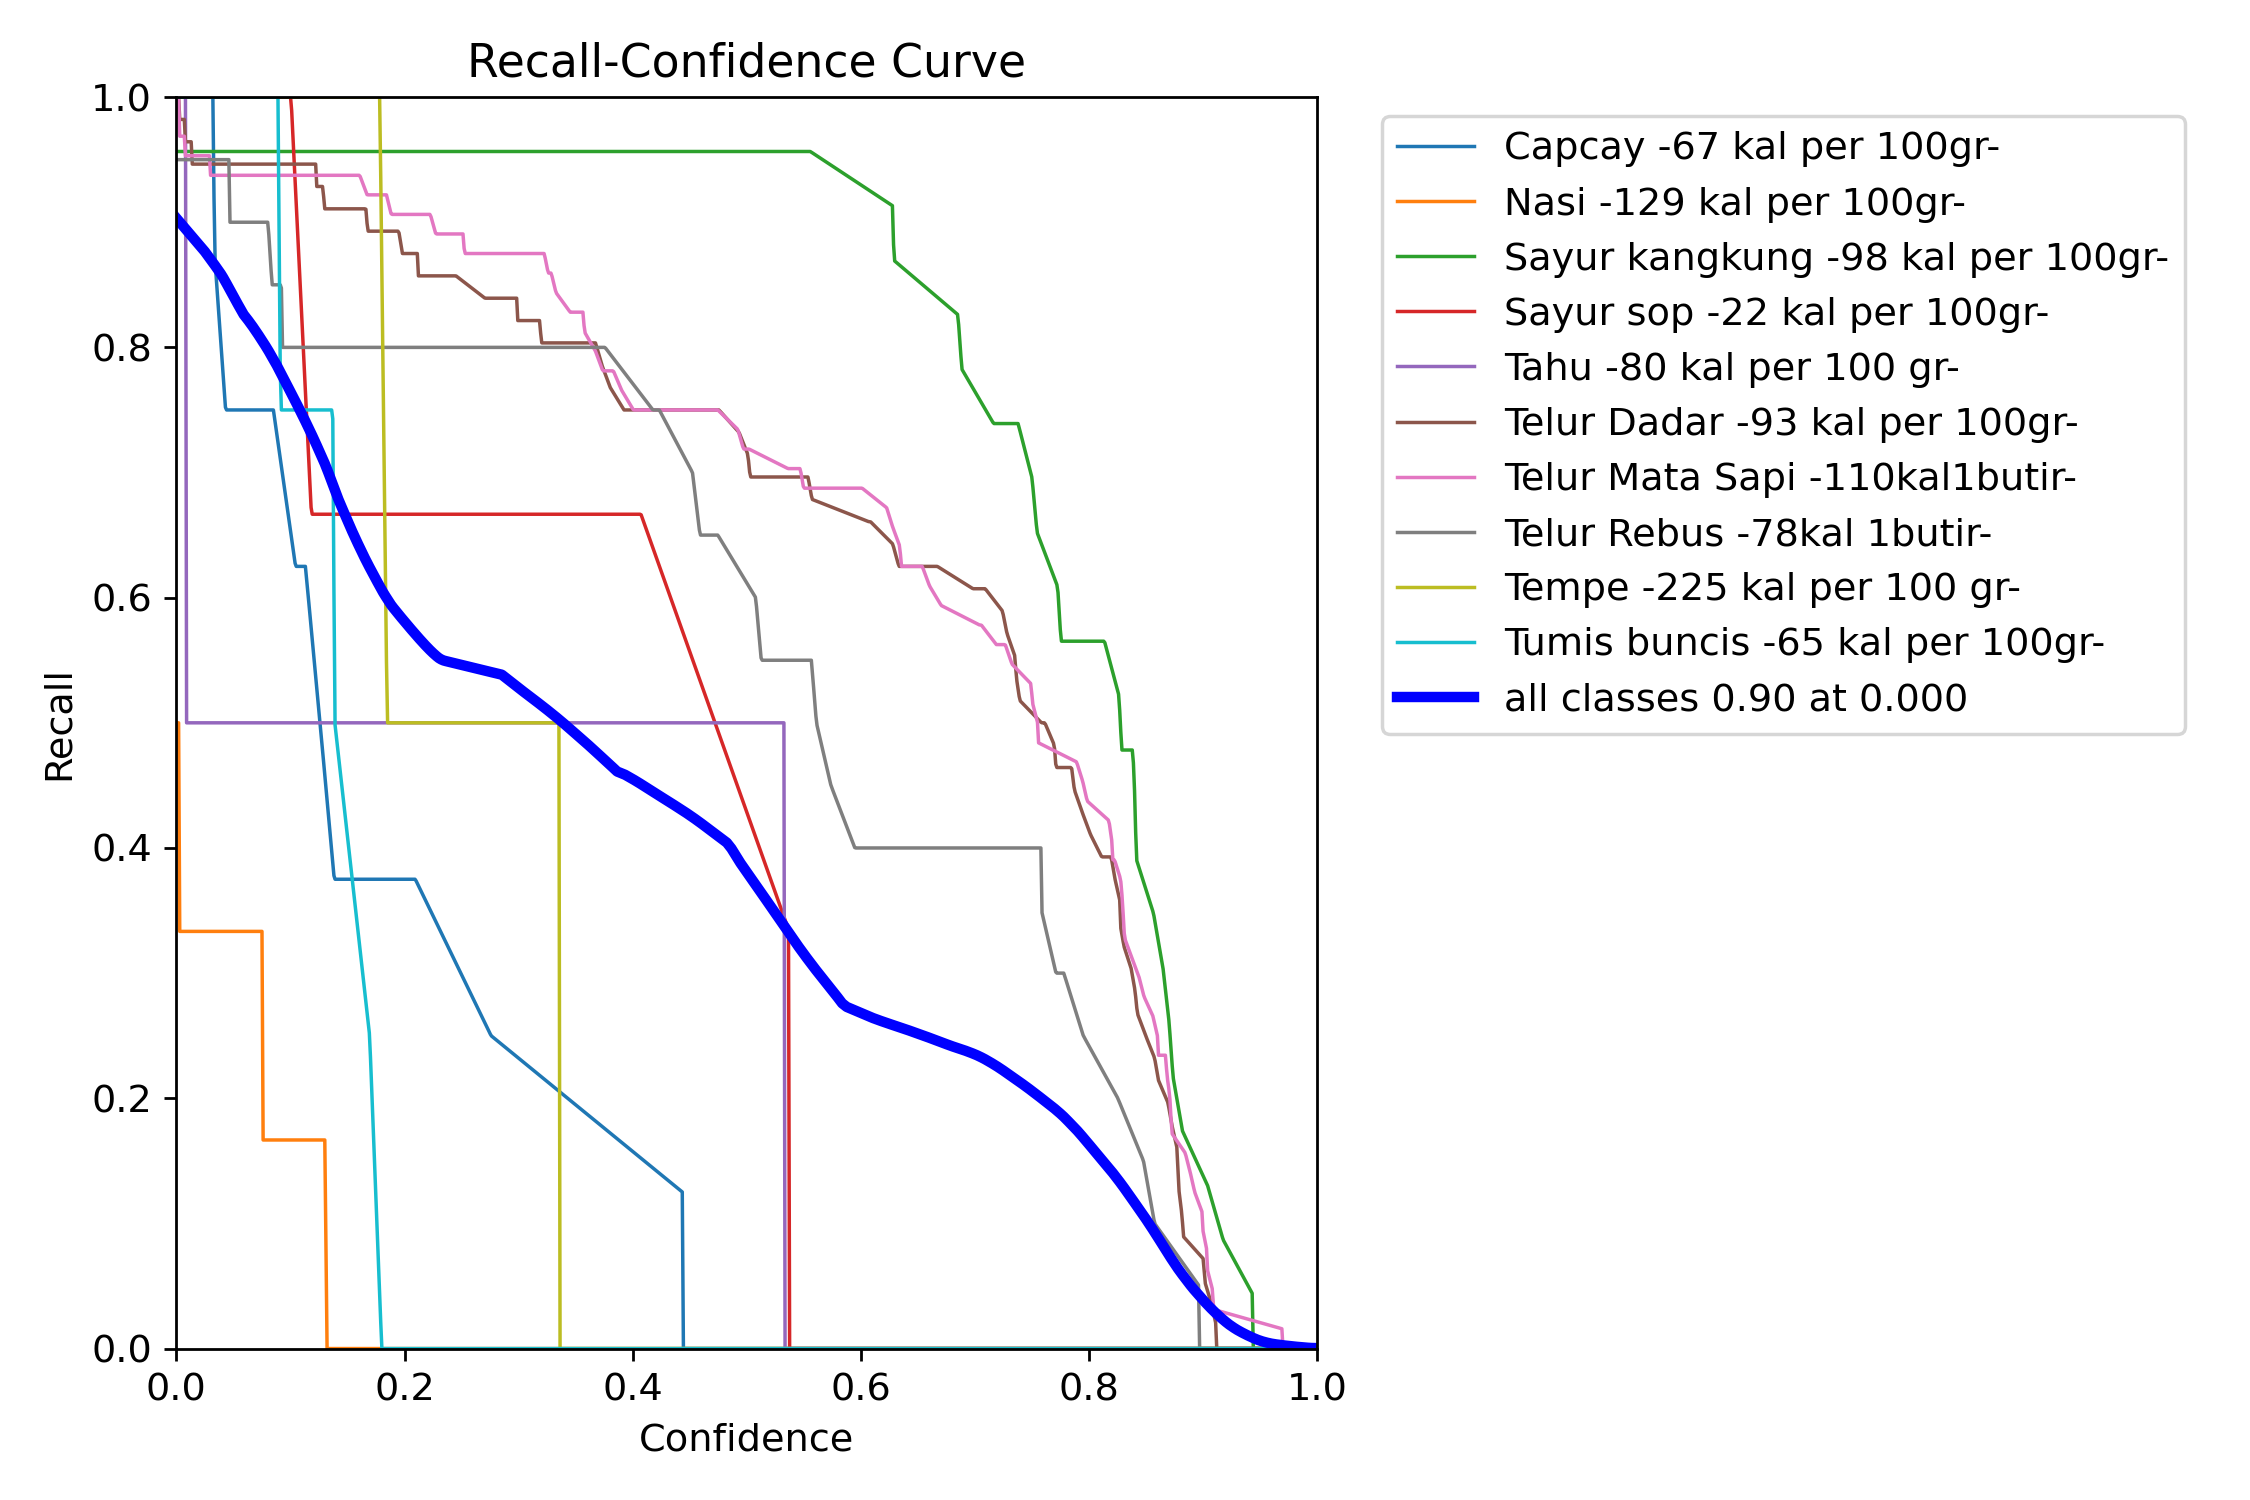

In [ ]:
#RECALL-CONFIDENCE CURVE
Image(filename=f'/content/runs/detect/train3/BoxR_curve.png', width=1000)

In [ ]:
#DOWNLOAD MODEL WEIGHTS
!gdown "https://drive.google.com/uc?id=1ka7Gj8RE6iP8-ExtigZJhmiyr5k5lqRQ&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1ka7Gj8RE6iP8-ExtigZJhmiyr5k5lqRQ&confirm=t
To: /content/best.pt
100% 18.9M/18.9M [00:00<00:00, 44.4MB/s]


# VALIDATE FINE-TUNED MODEL

In [ ]:
model = YOLO("/content/runs/detect/train3/weights/best.pt")  # load a custom model

# Validate the model
metrics = model.val()  #
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv12l summary (fused): 283 layers, 26,348,324 parameters, 0 gradients, 88.6 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1652.4±251.5 MB/s, size: 53.9 KB)
val: Scanning /content/Calory-3/valid/labels.cache... 150 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 150/150 284.4Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 2.2it/s 4.5s
                   all        150        188      0.587      0.538      0.656      0.438
Capcay -67 kal per 100gr-          8          8          1      0.244      0.737      0.567
Nasi -129 kal per 100gr-          6          6          0          0     0.0183    0.00458
Sayur kangkung -98 kal per 100gr-         23         23      0.671      0.957      0.891      0.647
Sayur sop -22 kal per 100gr-          3          3      0.392      0.667      0.764      0.419
Tahu -80 kal per 1

array([    0.43807,     0.56682,   0.0045771,     0.43807,     0.64672,     0.41908,     0.44726,      0.5146,     0.54414,     0.45245,     0.48213,     0.30294])

# INFERENCE

In [ ]:
results = model.predict(source = f"/content/Calory-3/test/images", save = True)


image 1/108 /content/Calory-3/test/images/1374953_jpg.rf.d9a4d0321dfd59e926c6d769e72e7eab.jpg: 640x640 1 Telur Dadar -93 kal per 100gr-, 24.4ms
image 2/108 /content/Calory-3/test/images/1380765_jpg.rf.081b22e2afc96685a7570e914286c778.jpg: 640x640 2 Telur Dadar -93 kal per 100gr-s, 24.7ms
image 3/108 /content/Calory-3/test/images/1640730_jpg.rf.694038993383dcc0d00cff4c04bbf66c.jpg: 640x640 2 Telur Dadar -93 kal per 100gr-s, 24.7ms
image 4/108 /content/Calory-3/test/images/1652710_jpg.rf.b9f3a3fc26bb9e61cdb1ad6e43f15591.jpg: 640x640 1 Telur Dadar -93 kal per 100gr-, 1 Telur Mata Sapi -110kal1butir-, 24.7ms
image 5/108 /content/Calory-3/test/images/1675150_jpg.rf.f131f62bffd7d02364a956f0a8ed1c58.jpg: 640x640 1 Telur Dadar -93 kal per 100gr-, 24.9ms
image 6/108 /content/Calory-3/test/images/1699065_jpg.rf.dea040be60d057b862266d95decb6b04.jpg: 640x640 1 Telur Dadar -93 kal per 100gr-, 24.8ms
image 7/108 /content/Calory-3/test/images/2158248_jpg.rf.f2fde43c30cbdb0f18ab531c3433fa05.jpg: 640x

In [ ]:
#SHOWING INFERENCED IMAGE
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[41:60]:
    display(IPyImage(filename=img, width=600))
    print("\n")